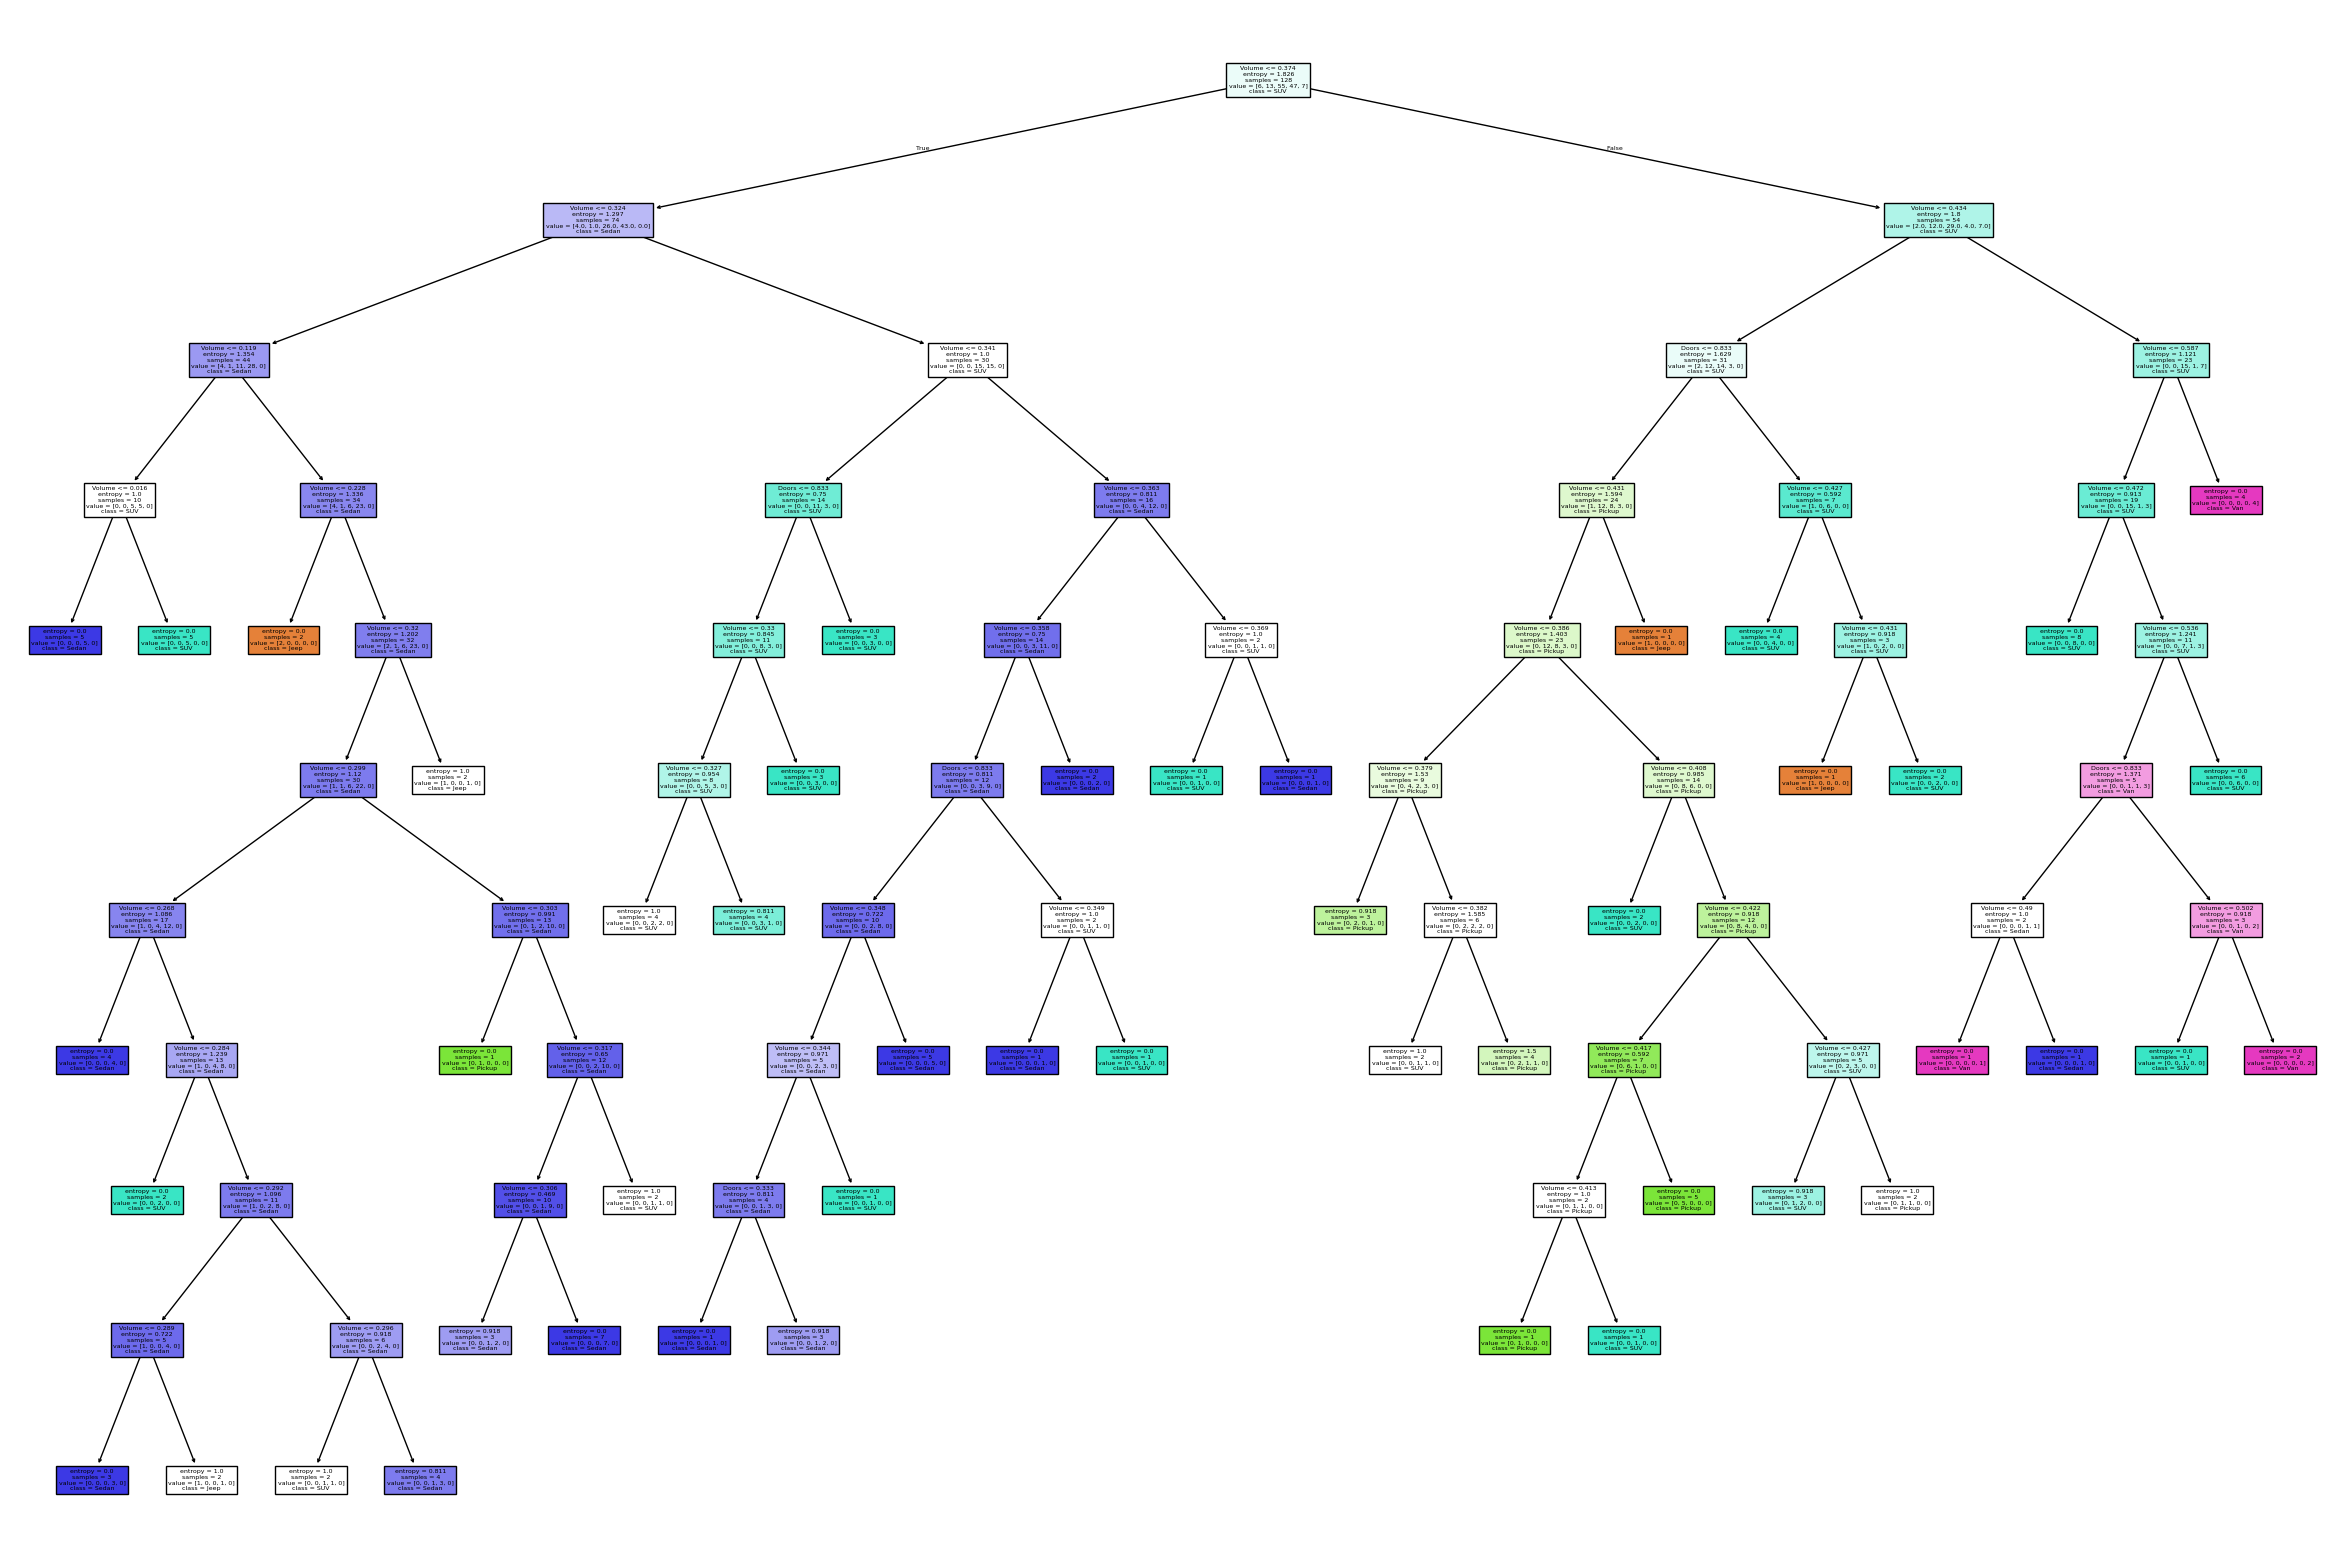

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# load data
df = pd.read_csv('AllCars.csv')

# normalize data
scaler = MinMaxScaler()
df[['Volume', 'Doors']] = scaler.fit_transform(df[['Volume', 'Doors']])

# split data 80/20
X = df[['Volume', 'Doors']]
y = df['Style']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

# save as TreeCars.png
plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=['Volume', 'Doors'], class_names=dt.classes_, filled=True)
plt.savefig('TreeCars.png')

# predictions and accuracy
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#csv with accuracy row at bottom
test_results = df.loc[X_test.index, ['Volume', 'Doors', 'Style']].copy()
test_results['PredictedStyle'] = y_pred

#extra row for bottom
accuracy_row = pd.DataFrame([['','', 'Overall Accuracy', accuracy]], columns=['Volume', 'Doors', 'Style', 'PredictedStyle'])

final_tree_df = pd.concat([test_results, accuracy_row], ignore_index=True)
final_tree_df.to_csv('TreeCars.csv', index=False)